# Project: TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In this project we are going to analyze TMDb Movie Dataset. This data set contains information about 10,000 movies collected from the Movie Database (TMDb), including user ratings and revenue.
In this project we will try to answer a few questions such as
<ul>
<li>What was the profit earned by each movie?</li>
<li>Which genres are most popular from year to year?</li>
<li>Which movie earns the most and least profit?</li>
<li>Movies with largest and lowest budgets?</li>
<li>Which movie had the greatest and least runtime?</li>
<li>Which movies has most and least earned revenue?</li>
<li>Average runtime of the movies</li>
<li>Which Year Has The Highest Profit Rate? (Year vs Average Profit)</li>
<li>Did movies with higher vote count received a better rating?</li>
<li>Which length movies most liked by the audiences according to their popularity?</li>
<li>Year of release vs Total Profit Earned</li>
<li>Average Budget of the movies</li>
<li>Average Revenue earned by the movies</li>
</ul>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Obsevations from the data set
> 1.) No unit of currency is mentioned in the dataset. So for my analysis I will take it as dollar as it is the most used international currency.


In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning 

### 1.Removing data columns that will not be useful for our analysis.

In [7]:
#Removing Columns that will not be useful for our analysis
df.drop(['id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'overview','tagline'], axis=1, inplace=True) 
#all these columns will not help us to answer the ques that I have stated above.

In [8]:
df.info() #Seeing the new dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.2+ MB


In [9]:
df.shape

(10866, 14)

Now, we are left with 14 columns

### 2. Removing the duplicacy in the rows(if any).



In [10]:
df.drop_duplicates(keep = 'first', inplace = True)
df.shape

(10865, 14)

>One Duplicate Row removed
### 3. Removing 0's from budget and the revenue columns


In [11]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [12]:
#number of rows having 0 in revenue
rz=df[df['revenue']==0]
rz.count().revenue

6016

In [13]:
##number of rows having 0 in budget
bz=df[df['budget']==0]
bz.count().budget

5696

In [14]:
flist=['budget', 'revenue', 'runtime']

#this will replace all the value from '0' to NAN in the list
df[flist] = df[flist].replace(0, np.NAN)

In [15]:
#Checking null values now
x=df.isnull()
x.sum()

popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
director                  44
keywords                1493
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

Let's look at the distribution of Data now

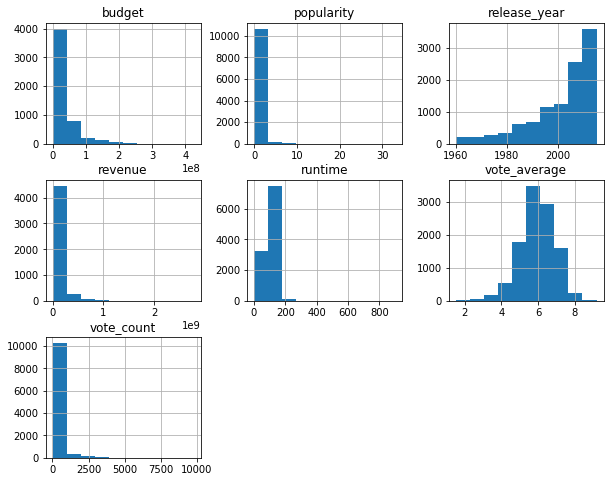

In [16]:
df.hist(figsize=(10,8));

We notice that the histograms labeled “budget”, “revenue”, "popularity", "vote_count" are right-skewed. The max values of these columns different from all of the other numbers.

The histogram of "release_year" is left-skewed, which means that the number of movie releasing each year increased continuouly.

The histogram of "vote_average" is almost normally distributed.

### 4. Changing the release date column into standard date format

In [17]:
df.release_date = pd.to_datetime(df['release_date'])

In [18]:
#printing changes
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10865 non-null float64
budget                  5169 non-null float64
revenue                 4849 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10834 non-null float64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 1.2+ MB


There are still missing values in our dataset, but we will try to use as much data for our analysis as possible.

### 5. Seperating columns with several values. We will split by an '|' into as many columns as needed

In [20]:
df_cs = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_dc = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_kw = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
df_gr = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_pc = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))

#Checking
df_pc.head()

,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [21]:
#Joining the seperated columns to the original dataframe

df = df.join([df_cs, df_dc, df_kw, df_gr, df_pc])

In [22]:
#dropping unneeded columns for the analysis
df = df.drop(['cast', 'keywords', 'director', 'genres', 'production_companies'], axis=1)

In [23]:
df.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,cast_1,...,genres_1,genres_2,genres_3,genres_4,genres_5,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,2015-06-09,5562,6.5,2015,Chris Pratt,...,Action,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,2015-05-13,6185,7.1,2015,Tom Hardy,...,Action,Adventure,Science Fiction,Thriller,None,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,2015-03-18,2480,6.3,2015,Shailene Woodley,...,Adventure,Science Fiction,Thriller,None,None,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,2015-12-15,5292,7.5,2015,Harrison Ford,...,Action,Adventure,Science Fiction,Fantasy,None,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,2015-04-01,2947,7.3,2015,Vin Diesel,...,Action,Crime,Thriller,None,None,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


<a id='eda'></a>
## Exploratory Data Analysis

Before answering the questions, lets figure out the profits of each movie.


### What was the profit earned by each movie?

In [24]:
#To calculate profit of each movie, we need to substract the budget from the revenue of each movie
df.insert(2,'profit_earned',df['revenue']-df['budget'])
df.head()

,popularity,budget,profit_earned,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,...,genres_1,genres_2,genres_3,genres_4,genres_5,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
0,32.985763,150000000.0,1.363529e+09,1.513529e+09,Jurassic World,124.0,2015-06-09,5562,6.5,2015,...,Action,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,28.419936,150000000.0,2.284364e+08,3.784364e+08,Mad Max: Fury Road,120.0,2015-05-13,6185,7.1,2015,...,Action,Adventure,Science Fiction,Thriller,None,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,13.112507,110000000.0,1.852382e+08,2.952382e+08,Insurgent,119.0,2015-03-18,2480,6.3,2015,...,Adventure,Science Fiction,Thriller,None,None,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,11.173104,200000000.0,1.868178e+09,2.068178e+09,Star Wars: The Force Awakens,136.0,2015-12-15,5292,7.5,2015,...,Action,Adventure,Science Fiction,Fantasy,None,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,9.335014,190000000.0,1.316249e+09,1.506249e+09,Furious 7,137.0,2015-04-01,2947,7.3,2015,...,Action,Crime,Thriller,None,None,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


### Which genres are most popular from year to year?

In [25]:
# Selecting genres columns for the analysis of the original data frame
df_genres = df.loc[:, 'genres_1': 'genres_5' ]

In [26]:
# Adding release year to df_genres
df_genres_with_dates = df_genres.join(df['release_year'])

In [27]:
ys = df_genres_with_dates['release_year'].unique() #creates an array of years mentioned in release year 
most_common = [] #creates a list of tuples for most common genres in specific years

for y in ys:
    #creates df filtered by every year mentioned in years
    a = df_genres_with_dates[df_genres_with_dates['release_year'] == y] 
    #drops columns "release_year to perferm stack value count in next line
    b = a.drop(['release_year'], axis = 1)
    #performs value count through genres_1 - genres_5 and stores the index of maximum count
    c = b.stack().value_counts().idxmax() 
    #creates a masked DataFrame for respective years
    x = df[df['release_year'] == y]
    #creates the mean of vote_average and stores the index of maximum value
    z = x.groupby(['genres_1'])['vote_average'].mean().idxmax()
    
    most_common.append((y, c, z))

#creates df for list of tuples named most_common
df_most_popular = pd.DataFrame(most_common, columns=['release_year', 'most_popular_produced_genre', 'most_popular_voted_gerne']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_popular


,release_year,most_popular_produced_genre,most_popular_voted_gerne
0,1960,Drama,Drama
1,1961,Drama,Science Fiction
2,1962,Drama,Mystery
3,1963,Comedy,Animation
4,1964,Drama,Thriller
5,1965,Drama,Animation
6,1966,Comedy,Animation
7,1967,Comedy,Crime
8,1968,Drama,Romance
9,1969,Drama,History


### Similary, We can find which cast members were most popular year by year!

In [28]:
# Selecting cast columns for the analysis of the original data frame
df_cast = df.loc[:, 'cast_1': 'cast_5' ]

In [29]:
# Adding release year to df_cast
df_cast_with_dates = df_cast.join(df['release_year'])

In [30]:
ys = df_cast_with_dates['release_year'].unique() #creates an array of years mentioned in release year 
most_common = [] #creates a list of tuples for most common cast in specific years

for y in ys:
    #creates df filtered by every year mentioned in years
    a = df_cast_with_dates[df_cast_with_dates['release_year'] == y] 
    #drops columns "release_year to perferm stack value count in next line
    b = a.drop(['release_year'], axis = 1)
    #performs value count through cast_1 - cast_5 and stores the index of maximum count
    c = b.stack().value_counts().idxmax() 
    #creates a masked DataFrame for respective years
    x = df[df['release_year'] == y]
    #creates the mean of vote_average and stores the index of maximum value
    z = x.groupby(['cast_1'])['vote_average'].mean().idxmax()
    
    most_common.append((y, c, z))

#creates df for list of tuples named most_common
df_most_popular = pd.DataFrame(most_common, columns=['release_year', 'most_popular_produced_cast', 'most_popular_voted_cast']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_popular


,release_year,most_popular_produced_cast,most_popular_voted_cast
0,1960,Jean Simmons,Anthony Perkins
1,1961,Audrey Hepburn,James Cagney
2,1962,Gregory Peck,Peter O'Toole
3,1963,Flora Robson,Cary Grant
4,1964,Vincent Price,Peter Sellers
5,1965,Michael Anderson Jr.,Ann Altieri
6,1966,Michael Caine,Sterling Holloway
7,1967,Sidney Poitier,Warren Beatty
8,1968,Clint Eastwood,Keir Dullea
9,1969,Camilla Sparv,David Bradley


### Also, We can find which keywords were most popular year by year!

In [31]:
# Selecting keyword for the analysis of the original data frame
df_keywords = df.loc[:, 'keywords_1': 'keywords_5' ]

In [32]:
# Adding release year to df_keywords
df_keywords_with_dates = df_keywords.join(df['release_year'])

In [33]:
ys = df_keywords_with_dates['release_year'].unique() #creates an array of years mentioned in release year 
most_common = [] #creates a list of tuples for most common cast in specific years

for y in ys:
    
    a = df_keywords_with_dates[df_keywords_with_dates['release_year'] == y] 
    b = a.drop(['release_year'], axis = 1)
    c = b.stack().value_counts().idxmax() 
    x = df[df['release_year'] == y]
    z = x.groupby(['keywords_1'])['vote_average'].mean().idxmax()
    
    most_common.append((y, c, z))

#creates df for list of tuples named most_common
df_most_popular = pd.DataFrame(most_common, columns=['release_year', 'most_popular_produced_keyword', 'most_popular_voted_keyword']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_popular

,release_year,most_popular_produced_keyword,most_popular_voted_keyword
0,1960,hotel,new york
1,1961,spain,berlin
2,1962,suspense,black people
3,1963,independent film,based on novel
4,1964,general,u.s. president
5,1965,world war ii,holiday
6,1966,monster,alcohol
7,1967,england,ambush
8,1968,musical,moon
9,1969,world war ii,falcon


### Which movie earns the most and least profit?

In [34]:
def HL (column_name):
    
    #highest
    #taking the index value of the highest number in profit column
    highest_id = df[column_name].idxmax()
    #calling by index number,storing that row info to a variable
    highest_details = pd.DataFrame(df.loc[highest_id])
    
    #lowest
    #same processing as above
    lowest_id = df[column_name].idxmin()
    lowest_details = pd.DataFrame(df.loc[lowest_id])
    
    #concatenating two dataframes
    final_data = pd.concat([highest_details, lowest_details], axis = 1)
    
    return final_data

#calling the function and passing the argument
HL('profit_earned').dropna()

,1386,2244
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
profit_earned,2.54451e+09,-4.13912e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
runtime,162,100
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
vote_count,8458,74
vote_average,7.1,6.4
release_year,2009,2010


### Movies with largest and lowest budgets?

In [35]:
HL('budget').dropna()

,2244,1151
popularity,0.25054,0.177102
budget,4.25e+08,1
original_title,The Warrior's Way,Fear Clinic
runtime,100,95
release_date,2010-12-02 00:00:00,2014-10-31 00:00:00
vote_count,74,15
vote_average,6.4,4.1
release_year,2010,2014
cast_1,Kate Bosworth,Thomas Dekker
cast_2,Jang Dong-gun,Robert Englund


### Which movie had the greatest and least runtime?

In [36]:
HL('runtime').dropna()

,3894,4883
popularity,0.006925,0.078472
original_title,The Story of Film: An Odyssey,Fresh Guacamole
runtime,900,2
release_date,2011-09-03 00:00:00,2012-03-02 00:00:00
vote_count,14,29
vote_average,9.2,7.9
release_year,2011,2012
director_1,Mark Cousins,PES
genres_1,Documentary,Animation


### Which movies has most and least earned revenue?

In [37]:
HL('revenue').dropna()

,1386,5067
popularity,9.43277,0.462609
budget,2.37e+08,6e+06
profit_earned,2.54451e+09,-6e+06
revenue,2.78151e+09,2
original_title,Avatar,Shattered Glass
runtime,162,94
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
vote_count,8458,46
vote_average,7.1,6.4
release_year,2009,2003


### Average runtime of the movies

In [38]:
df.runtime.mean()

102.3638545320288

### Which Year Has The Highest Profit Rate? (Year vs Average Profit)

Text(0,0.5,'Average Profit')

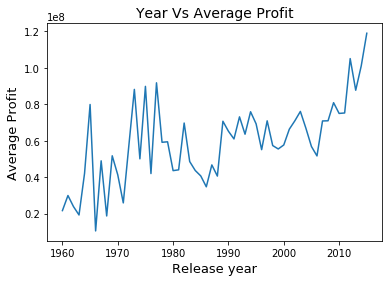

In [39]:
#take the average of profit made by movies in each year and plot.
#make the group of the data according to their release_year and find the mean profit and plot.
df.groupby('release_year').mean().profit_earned.plot()
plt.title("Year Vs Average Profit",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average Profit',fontsize = 13)

Looks like movies after 2010 started to gain alot more profit as comapared to movies before 2010.

### Did movies with higher vote count received a better rating?

In [40]:
#Slice DataFrame to get 2 columns 'vote_count' and 'vote_average'
df_vote = df.loc[:, 'vote_count' : 'vote_average']

#To compare results only entries are considered with more than 2000 votes
df_vote_2000 = df_vote[df_vote['vote_count'] > 2000]

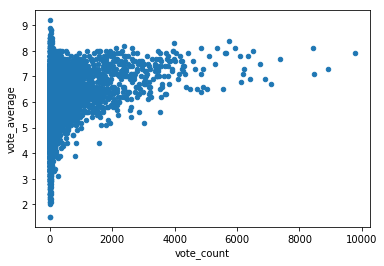

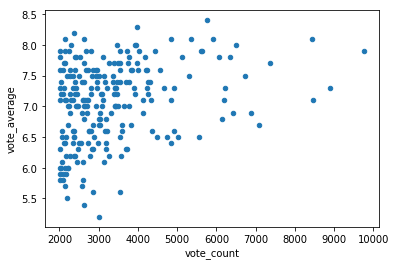

In [41]:
#Plotting a scatter plot
df_vote.plot(x='vote_count', y='vote_average', kind='scatter');
df_vote_2000.plot(x='vote_count', y='vote_average', kind='scatter');

In [42]:
df_vote.corr()

,vote_count,vote_average
vote_count,1.000000,0.253818
vote_average,0.253818,1.000000


In [43]:
df_vote_2000.corr()

,vote_count,vote_average
vote_count,1.000000,0.291649
vote_average,0.291649,1.000000


This does not indicate that movies with a higher vote_count receive a higher vote_average. Also by considering columns with more than 2000 vote_count does not change the impression. Furthermore, the corralation does not indicate that higher vote counts result in higher vote averages.

### Which length movies most liked by the audiences according to their popularity?

Text(0,0.5,'Average Popularity')

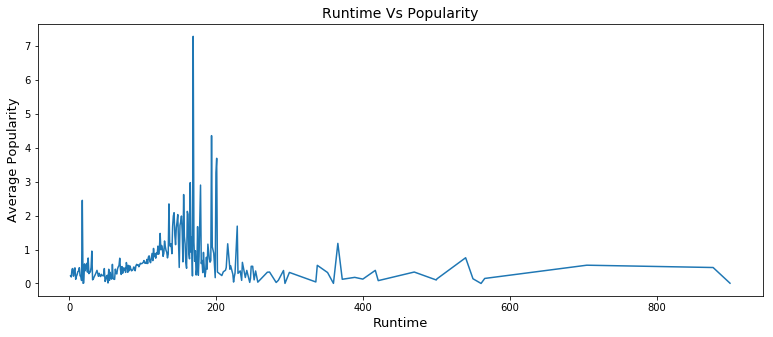

In [44]:
df.groupby('runtime').mean().popularity.plot(figsize = (13,5))

#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)

According to the plot we can say that movies in the range of 100-200 runtime are more popular than other runtime movies. Because it is boring to see the long duration movies.

###  Year of release vs Total Profit Earned

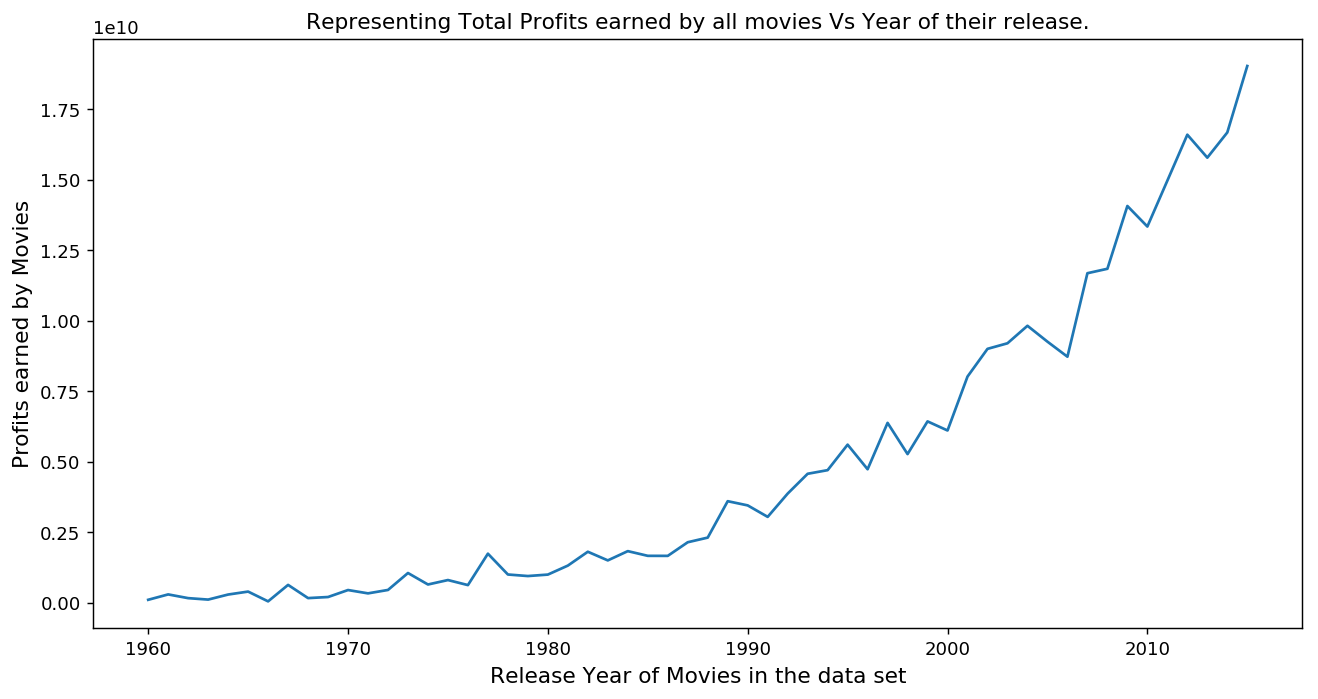

In [45]:
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

profits_year = df.groupby('release_year')['profit_earned'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()


In [46]:
#To find that which year made the highest profit?
profits_year.idxmax()

2015

### 9. Average Budget of the movies

In [47]:
df.budget.mean()

30739575.950667441

### 10. Average Revenue earned by the movies

In [48]:
df.revenue.mean()

89238858.70798102

<a id='conclusions'></a>
## Conclusions

This was a very interesting data analysis. We came out with some very interesting facts about movies. After this analysis we can conclude following:

1. Average Budget is around 40 millon dollar.
2. Average duration of the movie is around 110 minutes.
3. The Profit that movies generate as a whole are increasing year by year.
4. Also, movies with a higher vote_count does not necessarily receive a higher vote_average. Also by considering columns with more than 2000 vote_count does not change the impression. Furthermore, the corralation does not indicate that higher vote counts result in higher vote averages.
5. Movies in the range of 100-200 runtime are more popular than other runtime movies. Because it is boring to see the long duration movies.
6. After 2010, movies started to earn more profit on average as compared to earlier years.

**All results are limited to the underlying data set and as no advaned statistics were performed, the results can only be treated as indicators and are not generalizable. Furthermore, one has to consider that many entries in the dataset have been removed due to missing data**

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])